Curso de Big Data
==============================

Trabajo práctico 3
------------------------------

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

#### Parte 1: Análisis de la base de hogares y cálculo de pobreza
##### Ahora que ya se han familiarizado con la Encuesta Permanente de Hogares (EPH) y con la tabla de adulto equivalente, vamos a complejizar un poco la construcción del índice de pobreza. Lo calcularemos a nivel de hogares, con sus respectivos factores de expansioón y realizaremos una limpieza de la base con mayor dedicación. A continuación, complementamos el trabajo hecho en el TP2 usando la encuesta a nivel hogares de la EPH.

##### Inciso 1
##### Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen que pueden ser muy predictivas de pobreza y que sería muy útil incluir para perfeccionar el ejercicio del TP2?

###### Las variables relevantes para explicar la pobreza creemos que son las siguientes:
###### - ITF_hogar (Monto de ingreso total familiar)}: Evalúa la disponibilidad de recursos económicos en el hogar, lo que está estrechamente relacionado con la pobreza.
###### - Región (REGION): La ubicación geográfica de un hogar puede tener un impacto significativo en su nivel de vida y acceso a recursos. Por lo tanto, la región en la que se encuentra el hogar es una variable importante.
###### - Características de la vivienda (IV2, IV3, IV6, IV8, IV10, IV12_1, IV_12_2, IV12_3): Estas variables describen aspectos de la vivienda, como el número de habitaciones, el estado del piso, el acceso a agua, la presencia de baño, la proximidad a basurales, zonas inundables y villas de emergencia. Estas características pueden estar relacionadas con la calidad de vida y el nivel de pobreza.
###### Características habitacionales del hogar (II1, II7, II8, II9): Estas variables describen el número de habitaciones en el hogar, el régimen de tenencia de la vivienda y el tipo de combustible utilizado para cocinar.
###### Estrategias del hogar (V1, V2, V4, V5, V6, V12, V14, V17): Estas variables exploran cómo las personas del hogar obtienen ingresos y si han tenido que recurrir a estrategias como pedir préstamos, vender pertenencias o recibir ayuda social. Estas estrategias pueden indicar la vulnerabilidad económica del hogar.
###### Resumen del hogar (IX_TOT): La cantidad de miembros en el hogar es un factor importante para evaluar la pobreza, ya que un hogar con más miembros puede requerir más recursos para satisfacer sus necesidades básicas.
###### IPCF_hogar (Monto de ingreso per cápita familiar): Proporciona información sobre los recursos disponibles por persona en el hogar, lo que está relacionado con la pobreza.

##### Inciso 2
##### Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2023 (la base de hogares se llama usu hogar T123.xls). Importen los datos de la encuesta de hogar y, al igual que en el TP2, conserven sólo las observaciones que corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o del Gran Buenos Aires

In [1]:
# Importamos el módulo necesario para trabajar con la base de datos y otros propositos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seteamos el directorio donde vamos a trabajar
import os

os.chdir("C:/Users/bauti/OneDrive/Documentos/Escritorio/Big Data/TP2/EPH_usu_1er_Trim_2023_xlsx")

In [3]:
# Cargamos las bases
microdata_hogar = pd.read_excel("usu_hogar_T123.xlsx")

In [4]:
microdata_indv = pd.read_excel("usu_individual_T123.xlsx")

In [5]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_indv_filtered = microdata_indv[(microdata_indv['AGLOMERADO'] == 32) | (microdata_indv['AGLOMERADO'] == 33)]
len(microdata_indv_filtered)

7619

In [7]:
# Filtramos el dataframe y lo renombramos
microdata_hogar_filtered = microdata_hogar[(microdata_hogar['AGLOMERADO'] == 32) | (microdata_hogar['AGLOMERADO'] == 33)]
len(microdata_hogar_filtered)


2736

##### Inciso 3: Unan la tabla de la encuesta individual con la de la encuesta de hogar.

In [11]:
# Realizamos un inner join de las bases para quedarnos solo con las filas cuyo identificador de hogar se encuentre en ambas bases
# Importante remarcar que hacemos el merge por vivienda y hogar! ya que pueden haber 2 viviendas en un mismo hogar.

merged_microdata = microdata_indv_filtered.merge(microdata_hogar_filtered, on=['CODUSU', "NRO_HOGAR"], how='inner')

# Renombrar las columnas con sufijo "_x" a "_indv"
merged_microdata.rename(columns=lambda x: x.replace("_x", "_indv"), inplace=True)

# Renombrar las columnas con sufijo "_y" a "_hogar"
merged_microdata.rename(columns=lambda x: x.replace("_y", "_hogar"), inplace=True)

# Esto ultimo no es particularmente necesario pues muchos de los valores son duplicados.

In [12]:
# Chequeamos la dimension
len(merged_microdata)

7619

##### Inciso 4: Generen sus propias funciones para limpiar la base de datos o, si deciden utilizar funciones existentes en paquetes como numpy y pandas, mencionen cuáles usarán y de qué paquetes son.
##### &
##### Inciso 5: Limpien la base de datos tomando criterios que hagan sentido, tanto para el tratamiento de valores faltantes, de outliers, como así también decidan qué variables categóricas y strings usarían y transfórmenlas de forma que haga sentido para los ejercicios siguientes. Justifiquen sus decisiones.

In [13]:
# Identificar variables con NaN y contar cuántos NaN
# Utilizamos funciones de Pandas para identificar y limpiar NaN.

variables_con_nan = merged_microdata.columns[merged_microdata.isna().any()].tolist()
conteo_de_nans = merged_microdata[variables_con_nan].isna().sum()

# Imprimir las variables con NaN y la cantidad de NaN en cada una
for variable in variables_con_nan:
    print(f'Variable: {variable}, Cantidad de NaN: {conteo_de_nans[variable]}')

Variable: CH08, Cantidad de NaN: 1
Variable: CH14, Cantidad de NaN: 3959
Variable: CH15_COD, Cantidad de NaN: 6248
Variable: CH16_COD, Cantidad de NaN: 7515
Variable: IMPUTA, Cantidad de NaN: 7548
Variable: PP03C, Cantidad de NaN: 4096
Variable: PP03D, Cantidad de NaN: 4096
Variable: PP3E_TOT, Cantidad de NaN: 4096
Variable: PP3F_TOT, Cantidad de NaN: 4096
Variable: PP03G, Cantidad de NaN: 4096
Variable: PP03H, Cantidad de NaN: 4096
Variable: PP03I, Cantidad de NaN: 4096
Variable: PP03J, Cantidad de NaN: 4096
Variable: INTENSI, Cantidad de NaN: 4096
Variable: PP04A, Cantidad de NaN: 4096
Variable: PP04B_COD, Cantidad de NaN: 4096
Variable: PP04B1, Cantidad de NaN: 4096
Variable: PP04B2, Cantidad de NaN: 4096
Variable: PP04B3_MES, Cantidad de NaN: 4096
Variable: PP04B3_ANO, Cantidad de NaN: 4096
Variable: PP04B3_DIA, Cantidad de NaN: 4096
Variable: PP04C, Cantidad de NaN: 4096
Variable: PP04C99, Cantidad de NaN: 4096
Variable: PP04D_COD, Cantidad de NaN: 4096
Variable: PP04G, Cantidad d

In [14]:
# Establecer el umbral de 3500 para determinar qué columnas eliminar
umbral = 3500

# Eliminar columnas con más de 3500 valores NaN
# Utilizamos la funcion de Pandas dropna

merged_microdata = merged_microdata.dropna(thresh=umbral, axis=1)
merged_microdata.head(2)

,CODUSU,ANO4_indv,TRIMESTRE_indv,NRO_HOGAR,COMPONENTE,H15,REGION_indv,MAS_500_indv,AGLOMERADO_indv,PONDERA_indv,...,RDECCFR_hogar,GDECCFR_hogar,ADECCFR_hogar,PONDIH_hogar,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0


In [15]:
# Definimos las variables que deseamos filtrar
variables = ['ITF_hogar', 'ITF_indv', 'IPCF_hogar', 'IPCF_indv', 'P21', 'P47T']

# Definir el umbral del percentil (en este caso, 97%)
percentile_threshold = 0.97

# Iterar sobre las variables y aplicar el filtrado utlizando Pandas.
for variable in variables:
    # Calcular el percentil umbral
    percentile_value = merged_microdata[variable].quantile(percentile_threshold)
    
    # Filtrar el DataFrame para mantener solo los valores por debajo del percentil
    merged_microdata = merged_microdata[merged_microdata[variable] <= percentile_value]

len(merged_microdata)

6363

In [16]:
# Limpiamos algunas variables con valores especificos utlizando Pandas

merged_microdata = merged_microdata[merged_microdata['CH08'] != 9]
merged_microdata = merged_microdata[merged_microdata['IV2'] != 99]
merged_microdata = merged_microdata[merged_microdata['II1'] != 99]
merged_microdata = merged_microdata[merged_microdata['II9'] > 0]
merged_microdata = merged_microdata[merged_microdata['ITF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['ITF_indv'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_indv'] >= 0]


len(merged_microdata)

6335

##### Inciso 6: Presenten estadísticas descriptivas de cinco variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir pobreza.

**IV8** Tiene baño

**IV3** Piso interior de la casa

**V4** La cubierta exterior del techo es de...

**IV11** El desague del baño es...

**IPCF_hogar** Monto de ingreso per cápita familiar del hogar

##### Separamos el analisis entre categoricas y no categoricas.

In [36]:
merged_microdata['IPCF_hogar'].describe().T

,count,mean,std,min,25%,50%,75%,max
IPCF_hogar,6335.0,25048.015656,32095.284287,0.0,0.0,0.0,45480.0,125000.0


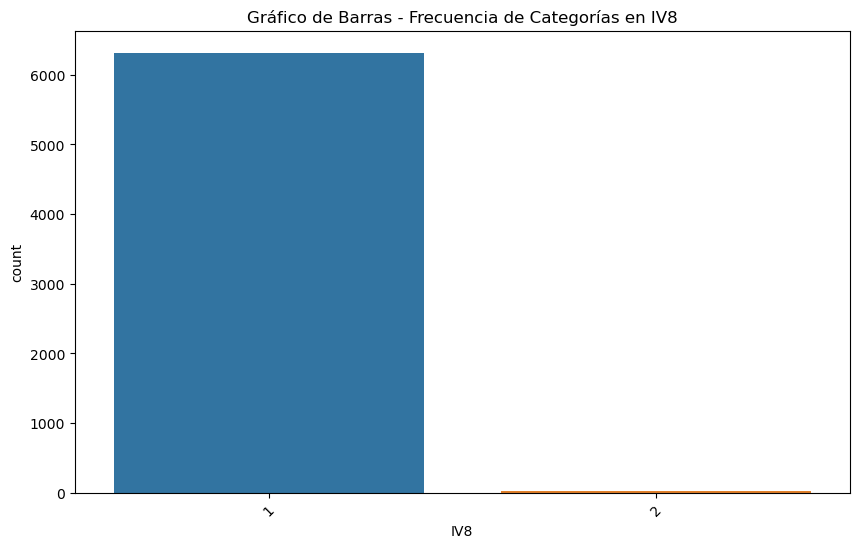

Porcentaje de cada categoría en IV8:
IV8
1    99.73165
2     0.26835
Name: proportion, dtype: float64



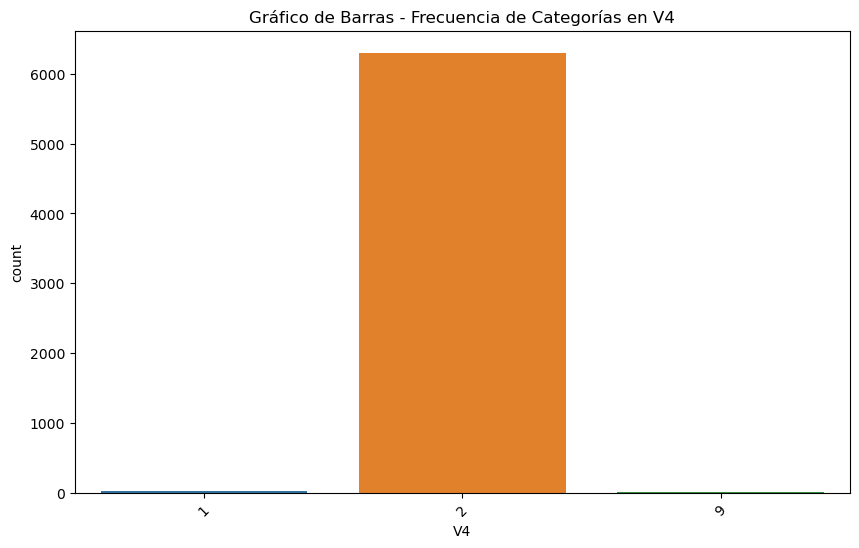

Porcentaje de cada categoría en V4:
V4
2    99.526440
1     0.347277
9     0.126283
Name: proportion, dtype: float64



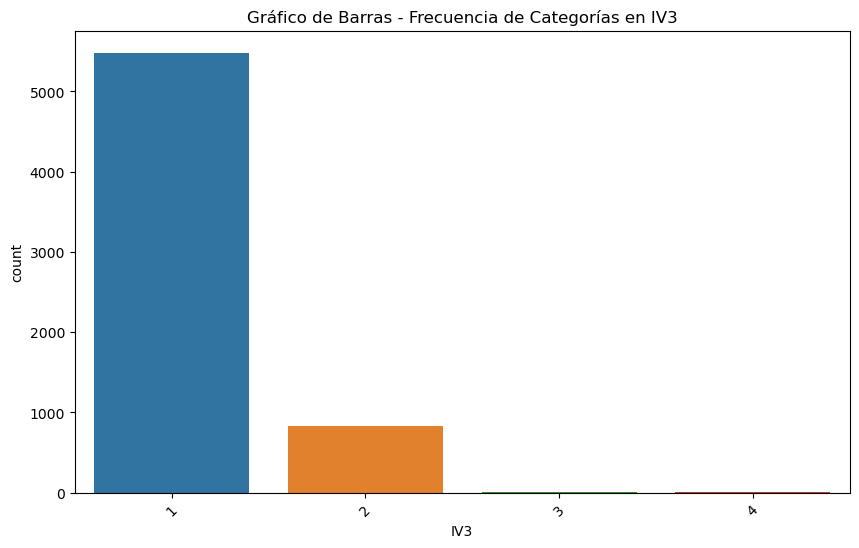

Porcentaje de cada categoría en IV3:
IV3
1    86.566693
2    13.149171
3     0.205209
4     0.078927
Name: proportion, dtype: float64



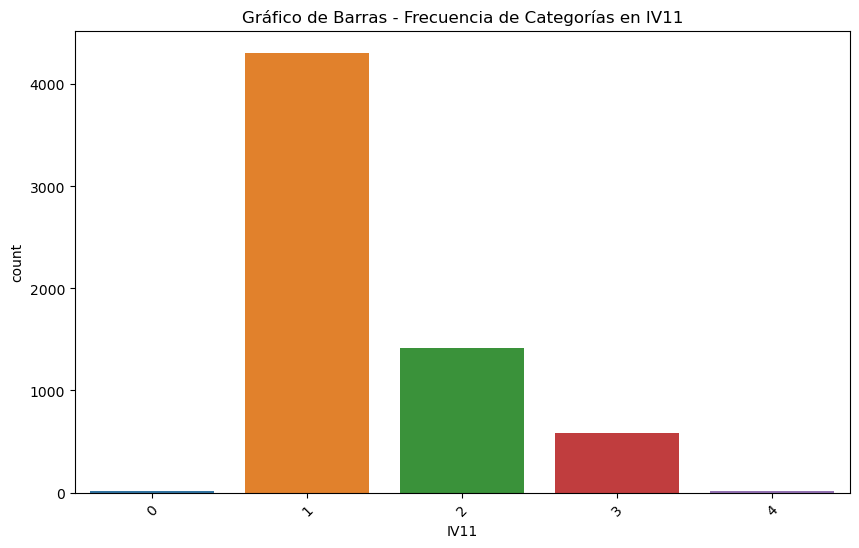

Porcentaje de cada categoría en IV11:
IV11
1    68.034728
2    22.304657
3     9.171271
0     0.268350
4     0.220994
Name: proportion, dtype: float64



In [39]:
variables = ['IV8', 'V4', 'IV3', 'IV11']

for var in variables:
    # Conteo de frecuencias
    conteo_frecuencias = merged_microdata[var].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_microdata, x=var)
    plt.title(f'Gráfico de Barras - Frecuencia de Categorías en {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Porcentaje de cada categoría
    porcentaje = merged_microdata[var].value_counts(normalize=True) * 100
    print(f"Porcentaje de cada categoría en {var}:")
    print(porcentaje)
    print()

In [17]:
# Armamos una función para no tener que lidiar con el tedioso uso del archivo de Excel.

# Esta función, asignar_valor, toma dos argumentos, edad y genero, y asigna un valor numérico basado en reglas condicionales
# que dependen de estos dos argumentos. Las condiciones se prueban en orden y, cuando se encuentra una coincidencia, se
# devuelve un valor específico. Si no se cumple ninguna condición, la función devuelve None.
#Las condiciones están diseñadas para categorizar a las personas en grupos según su edad y género y asignarles un valor numérico basado en esas categorías.

def asignar_valor(edad, genero):
    if edad < 1:
        if genero == 2:
            return 0.35
        elif genero == 1:
            return 0.35
    elif edad == 1:
        if genero == 2:
            return 0.37
        elif genero == 1:
            return 0.37
    elif edad == 2:
        if genero == 2:
            return 0.46
        elif genero == 1:
            return 0.46
    elif edad == 3:
        if genero == 2:
            return 0.51
        elif genero == 1:
            return 0.51
    elif edad == 4:
        if genero == 2:
            return 0.55
        elif genero == 1:
            return 0.55
    elif edad == 5:
        if genero == 2:
            return 0.60
        elif genero == 1:
            return 0.60
    elif edad == 6:
        if genero == 2:
            return 0.64
        elif genero == 1:
            return 0.64
    elif edad == 7:
        if genero == 2:
            return 0.66
        elif genero == 1:
            return 0.66
    elif edad == 8:
        if genero == 2:
            return 0.68
        elif genero == 1:
            return 0.68
    elif edad == 9:
        if genero == 2:
            return 0.69
        elif genero == 1:
            return 0.69
    elif edad == 10:
        if genero == 2:
            return 0.70
        elif genero == 1:
            return 0.79
    elif edad == 11:
        if genero == 2:
            return 0.72
        elif genero == 1:
            return 0.82
    elif edad == 12:
        if genero == 2:
            return 0.74
        elif genero == 1:
            return 0.85
    elif edad == 13:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.90
    elif edad == 14:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.96
    elif edad == 15:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif edad == 16:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.03
    elif edad == 17:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.04
    elif 18 <= edad <= 29:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.02
    elif 30 <= edad <= 45:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif 46 <= edad <= 60:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.00
    elif 61 <= edad <= 75:
        if genero == 2:
            return 0.67
        elif genero == 1:
            return 0.83
    elif edad > 75:
        if genero == 2:
            return 0.63
        elif genero == 1:
            return 0.74
    else:
        return None  # En caso de que no haya una combinación válida

##### Inciso 7: Repitan el inciso 1.2.f del TP2 para construir la columna adulto equiv y la columna ad equiv hogar (pueden utilizar su código del TP2).

In [18]:
# Aplicamos la funcion al data frame. Creamos una nueva columna llamada 'adulto_equiv' en el DataFrame 'microdata_filtered', donde se calculan y asignan valores equivalentes para adultos
# a partir de las edades ('CH06') y géneros ('CH04') de cada fila utilizando una función llamada 'asignar_valor'.

merged_microdata['adulto_equiv'] = merged_microdata.apply(lambda row: asignar_valor(row['CH06'], row['CH04']), axis=1)

In [20]:
# Limpiamos y Renombramos

merged_microdata = merged_microdata.dropna(subset=['adulto_equiv'])

result = merged_microdata.groupby(by=['CODUSU','NRO_HOGAR']).agg({'adulto_equiv': 'sum'}).reset_index()
result.rename(columns={'adulto_equiv': 'ad_equiv_hogar'}, inplace=True)

merged_microdata_FINAL = pd.merge(merged_microdata, result[['CODUSU','NRO_HOGAR', 'ad_equiv_hogar']],
                     on=['CODUSU','NRO_HOGAR'],
                     how='left')

##### Inciso 8: Repitan el inciso 1.3 y 1.4 del TP2 para dividir la base en dos dataframes donde: uno conserve las personas que no reportaron ITF (dataframe llamado respondieron) y otro conserve a las personas que no reportaron ITF (llamado norespondieron). Además, agreguen a la base respondieron una columna llamada ingreso necesario que sea el producto de la canasta básica por ad equiv hogar.

In [21]:
# Definimos ambas bases según los criterios del enunciado, comprobando la condición sobre ITF.
# Imprimimos la longitud del DataFrame para obtener las cantidades.

# Reemplazar NaN por ceros en ITF_indv e ITF_hogar
merged_microdata['ITF_indv'].fillna(0, inplace=True)
merged_microdata['ITF_hogar'].fillna(0, inplace=True)

respondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] != 0) | (merged_microdata_FINAL['ITF_hogar'] != 0)]
print(len(respondieron))

norespondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] == 0) & (merged_microdata_FINAL['ITF_hogar'] == 0)]
print(len(norespondieron))

3132
3203


In [22]:
# Definimos el valor de la canasta básica y luego
# seguimos las instrucciones del enunciado para añadir una columna que indique el ingreso necesario

valor_canasta_basica = 57371.05

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica

C:\Users\bauti\AppData\Local\Temp/ipykernel_16768/3528590793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica


##### Inciso 9: Agreguen a la base respondieron una columna llamada pobre, que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia y 0 en caso contrario.

In [23]:
# Creamos una nueva columna llamada 'pobre' en el DataFrame 'respondieron',
# donde se asigna un valor de 1 si el valor en la columna 'ITF' es menor que
# el valor en la columna 'ingreso_necesario', y 0 en caso contrario, convirtiendo los resultados a enteros.

respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)

# Sumamos todos los 1

num_pobres = respondieron['pobre'].sum()

print(f'Número de pobres identificados: {num_pobres}')

# En %

print(num_pobres/len(respondieron))



Número de pobres identificados: 1487
0.47477650063856963


C:\Users\bauti\AppData\Local\Temp/ipykernel_16768/2894708243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)


##### Inciso 10: En el TP2 calcularon los individuos bajo la línea de pobreza. Sin embargo, cuando se habla de pobreza el número más utilizado es el de la tasa de hogares bajo la línea de pobreza. Para calcularlo, utilicen una sola observación por hogar y sumen el ponderador PONDIH que permite expandir la muestra de la EPH al total de la población que representa. ¿Cuál es la tasa de hogares bajo la línea de pobreza para el GBA? ¿Se asemeja al que reporta el INDEC en sus informes?

In [24]:
merged_microdata_FINAL['PONDIH_hogar']

0        2540
1        2540
2       14082
3       14082
4       14082
        ...  
6330     4220
6331     4220
6332        0
6333        0
6334        0
Name: PONDIH_hogar, Length: 6335, dtype: int64

In [25]:
# Agrupar por hogar y utilizar el ponderador PONDIH para calcular la tasa de hogares pobres
# Agrupamos los datos por el código del hogar (CODUSU)
microdata_repres = respondieron.groupby('CODUSU').first().reset_index()


In [26]:
# Ponderacion
microdata_repres['ponderacion'] = microdata_repres['PONDIH_indv'] * microdata_repres['pobre']

In [27]:
pobres = microdata_repres['ponderacion'].sum()
poblacion = microdata_repres['PONDIH_indv'].sum()
porcentaje_pobres = (pobres / poblacion) * 100

In [28]:
pobres1 = '{:,}'.format(pobres).replace(',', '.')
print(f"pobres: {pobres1}")
print(f"tasa {porcentaje_pobres:.2f}%")

pobres: 1.439.914
tasa 36.67%


#### La tasa de pobreza nos dio 6 PP mayor que la reportada por el INDEC. Creemos que esto puede ser debido a distintos criterios de limpieza de la base. Aun asi, la diferencia no es tan significativa.